In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")

## 1

In [2]:
# Load the data
df = pd.read_csv("Laptop Data.csv")
df.head()

,Unnamed: 0,Name,Brand,Price,Rating,Processor_brand,Processor_gen,Core_per_processor,Energy_Efficient_Units,RAM_GB,RAM_type,Storage_capacity_GB,Storage_type,Graphics_brand,Display_size_inches,Horizontal_pixel,Vertical_pixel,Touch_screen,Operating_system
0,0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,HP,50399,4.30,AMD,5.0,6.0,0,8,DDR4,512,SSD,AMD,15.6,1920,1080,True,Windows 11 OS
1,1,Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...,Lenovo,26690,4.45,AMD,7.0,4.0,0,8,LPDDR5,512,SSD,AMD,15.6,1920,1080,False,Windows 11 OS
2,2,HP 15s-fq5007TU Laptop (12th Gen Core i3/ 8GB/...,HP,37012,4.65,Intel,12.0,6.0,0,8,DDR4,512,SSD,Intel,15.6,1920,1080,False,Windows 11 OS
3,3,Samsung Galaxy Book2 Pro 13 Laptop (12th Gen C...,Samsung,69990,4.75,Intel,12.0,12.0,0,16,LPDDR5,512,SSD,Intel,13.3,1080,1920,False,Windows 11 OS
4,4,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,Tecno,23990,4.25,Intel,11.0,2.0,0,8,LPDDR4,512,SSD,Intel,15.6,1920,1080,False,Windows 11 OS


## 2

In [ ]:
Supervised Learning is more suitable for this dataset because it contains labeled data "Price" which is to be predicted

## 3

In [ ]:
Goal is to predict numerical values "Price"(laptop sales prices), this is a Regression problem.

## 4

In [4]:
# Shape of the dataset
print("Shape of the dataset:", df.shape)

# Data types
print("\nData Types:")
print(df.dtypes)

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

Shape of the dataset: (1020, 19)

Data Types:
Unnamed: 0                  int64
Name                       object
Brand                      object
Price                       int64
Rating                    float64
Processor_brand            object
Processor_gen             float64
Core_per_processor        float64
Energy_Efficient_Units      int64
RAM_GB                      int64
RAM_type                   object
Storage_capacity_GB         int64
Storage_type               object
Graphics_brand             object
Display_size_inches       float64
Horizontal_pixel            int64
Vertical_pixel              int64
Touch_screen                 bool
Operating_system           object
dtype: object

Summary Statistics:
        Unnamed: 0          Price       Rating  Processor_gen  \
count  1020.000000    1020.000000  1020.000000     891.000000   
mean    509.500000   82063.474510     4.373676      10.450056   
std     294.592939   66502.150607     0.233295       2.966579   
min       0.0

## 5

In [5]:
print(df.isnull().sum())

Unnamed: 0                  0
Name                        0
Brand                       0
Price                       0
Rating                      0
Processor_brand             0
Processor_gen             129
Core_per_processor         12
Energy_Efficient_Units      0
RAM_GB                      0
RAM_type                   22
Storage_capacity_GB         0
Storage_type                0
Graphics_brand              2
Display_size_inches         0
Horizontal_pixel            0
Vertical_pixel              0
Touch_screen                0
Operating_system            0
dtype: int64


In [6]:
df.mode().iloc[0]

Unnamed: 0                                                                0
Name                      ASUS TUF Gaming A16 Advantage Edition FA617XS-...
Brand                                                                Lenovo
Price                                                               69990.0
Rating                                                                 4.75
Processor_brand                                                       Intel
Processor_gen                                                          13.0
Core_per_processor                                                      8.0
Energy_Efficient_Units                                                  0.0
RAM_GB                                                                 16.0
RAM_type                                                               DDR4
Storage_capacity_GB                                                   512.0
Storage_type                                                            SSD
Graphics_bra

In [7]:
# For Numaerical
# df.fillna(df.mean(), inplace=True)

#For Categorical
df.fillna(df.mode().iloc[0], inplace=True)
df.isnull().sum()

Unnamed: 0                0
Name                      0
Brand                     0
Price                     0
Rating                    0
Processor_brand           0
Processor_gen             0
Core_per_processor        0
Energy_Efficient_Units    0
RAM_GB                    0
RAM_type                  0
Storage_capacity_GB       0
Storage_type              0
Graphics_brand            0
Display_size_inches       0
Horizontal_pixel          0
Vertical_pixel            0
Touch_screen              0
Operating_system          0
dtype: int64

## 7

#### Use boxplots to visualize outliers:

<AxesSubplot:xlabel='Price'>

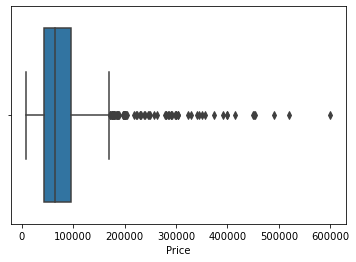

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df["Price"])
plt.show()

In [11]:
#To remove outliers using the IQR method:
Q1 = df["Price"].quantile(0.25)
Q3 = df["Price"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df["Price"] >= lower_bound) & (df["Price"] <= upper_bound)]

## 8

### Encoding Categorical Variables

In [13]:
# Use One-Hot Encoding for categorical variables:
df = pd.get_dummies(df, columns=["Brand", "Processor_brand", "Operating_system"], drop_first=True)

# Using Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Graphics_brand"] = le.fit_transform(df["Graphics_brand"])

In [15]:
df.columns

Index(['Unnamed: 0', 'Name', 'Price', 'Rating', 'Processor_gen',
       'Core_per_processor', 'Energy_Efficient_Units', 'RAM_GB', 'RAM_type',
       'Storage_capacity_GB', 'Storage_type', 'Graphics_brand',
       'Display_size_inches', 'Horizontal_pixel', 'Vertical_pixel',
       'Touch_screen', 'Brand_AXL', 'Brand_Acer', 'Brand_Apple', 'Brand_Asus',
       'Brand_Avita', 'Brand_Chuwi', 'Brand_Colorful', 'Brand_Dell',
       'Brand_Fujitsu', 'Brand_Gigabyte', 'Brand_HP', 'Brand_Honor',
       'Brand_Huawei', 'Brand_Infinix', 'Brand_Jio', 'Brand_LG',
       'Brand_Lenovo', 'Brand_MSI', 'Brand_Microsoft', 'Brand_Ninkear',
       'Brand_Primebook', 'Brand_Samsung', 'Brand_Tecno', 'Brand_Ultimus',
       'Brand_Walker', 'Brand_Wings', 'Brand_Xiaomi', 'Brand_Zebronics',
       'Brand_iBall', 'Processor_brand_Apple', 'Processor_brand_HiSilicon',
       'Processor_brand_Intel', 'Processor_brand_MediaTek',
       'Processor_brand_Microsoft', 'Processor_brand_Qualcomm',
       'Operating_system

## 9. Scaling the Data

In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
df[["RAM_GB", "Storage_capacity_GB"]] = scaler.fit_transform(df[[ "RAM_GB", "Storage_capacity_GB"]])

## 10. Dividing the Dataset into Predictors & Target Variables

In [17]:
X = df.drop("Price", axis=1)  # Features
y = df["Price"]  # Target variable

## 11. Splitting Data into Training & Testing Sets

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 12. Best Machine Learning Models for Laptop Price Prediction

In [23]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Identify categorical & numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(exclude=['object']).columns.drop("Price")

# Preprocessing: One-Hot Encoding for Categorical, Scaling for Numerical
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
])





# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
}

# Train & evaluate models
results = {}
for name, model in models.items():
    pipe = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])
    pipe.fit(X_train, y_train)
    
    y_pred = pipe.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MAE": mae, "RMSE": rmse, "R² Score": r2}

# Convert results to DataFrame & sort by R² Score
results_df = pd.DataFrame(results).T.sort_values(by="R² Score", ascending=False)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Unnamed: 0', 'Rating', 'Processor_gen', 'Core_per_processor',
       'Energy_Efficient_Units', 'RAM_GB', 'Storage_capacity_GB',
       'Graphics_brand', 'Display_size_inches', 'Horizontal_pixel',
       'Vertical_pixel', 'Touch_screen', 'Brand_AXL', 'Brand_Acer',
       'Brand_Apple', 'Brand_Asus'...
       'Operating_system_Linux OS', 'Operating_system_Mac 10.15.3\t OS',
       'Operating_system_Mac OS', 'Operating_system_Prime OS',
       'Operating_system_Ubuntu OS', 'Operating_system_Windows 10 OS',
       'Operating_system_Windows 11 OS', 'Operating_system_jio'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Name', 'RAM_type', 'Storage_ty

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Unnamed: 0', 'Rating', 'Processor_gen', 'Core_per_processor',
       'Energy_Efficient_Units', 'RAM_GB', 'Storage_capacity_GB',
       'Graphics_brand', 'Display_size_inches', 'Horizontal_pixel',
       'Vertical_pixel', 'Touch_screen', 'Brand_AXL', 'Brand_Acer',
       'Brand_Apple', 'Brand_Asus'...
       'Operating_system_Linux OS', 'Operating_system_Mac 10.15.3\t OS',
       'Operating_system_Mac OS', 'Operating_system_Prime OS',
       'Operating_system_Ubuntu OS', 'Operating_system_Windows 10 OS',
       'Operating_system_Windows 11 OS', 'Operating_system_jio'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Name', 'RAM_type', 'Storage_ty

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Unnamed: 0', 'Rating', 'Processor_gen', 'Core_per_processor',
       'Energy_Efficient_Units', 'RAM_GB', 'Storage_capacity_GB',
       'Graphics_brand', 'Display_size_inches', 'Horizontal_pixel',
       'Vertical_pixel', 'Touch_screen', 'Brand_AXL', 'Brand_Acer',
       'Brand_Apple', 'Brand_Asus'...
       'Operating_system_Linux OS', 'Operating_system_Mac 10.15.3\t OS',
       'Operating_system_Mac OS', 'Operating_system_Prime OS',
       'Operating_system_Ubuntu OS', 'Operating_system_Windows 10 OS',
       'Operating_system_Windows 11 OS', 'Operating_system_jio'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Name', 'RAM_type', 'Storage_ty

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Unnamed: 0', 'Rating', 'Processor_gen', 'Core_per_processor',
       'Energy_Efficient_Units', 'RAM_GB', 'Storage_capacity_GB',
       'Graphics_brand', 'Display_size_inches', 'Horizontal_pixel',
       'Vertical_pixel', 'Touch_screen', 'Brand_AXL', 'Brand_Acer',
       'Brand_Apple', 'Brand_Asus'...
       'Operating_system_Mac OS', 'Operating_system_Prime OS',
       'Operating_system_Ubuntu OS', 'Operating_system_Windows 10 OS',
       'Operating_system_Windows 11 OS', 'Operating_system_jio'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Name', 'RAM_type', 'Storage_type'], dtype='object'))])),
                ('model', DecisionTreeRegresso

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Unnamed: 0', 'Rating', 'Processor_gen', 'Core_per_processor',
       'Energy_Efficient_Units', 'RAM_GB', 'Storage_capacity_GB',
       'Graphics_brand', 'Display_size_inches', 'Horizontal_pixel',
       'Vertical_pixel', 'Touch_screen', 'Brand_AXL', 'Brand_Acer',
       'Brand_Apple', 'Brand_Asus'...
       'Operating_system_Linux OS', 'Operating_system_Mac 10.15.3\t OS',
       'Operating_system_Mac OS', 'Operating_system_Prime OS',
       'Operating_system_Ubuntu OS', 'Operating_system_Windows 10 OS',
       'Operating_system_Windows 11 OS', 'Operating_system_jio'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Name', 'RAM_type', 'Storage_ty

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Unnamed: 0', 'Rating', 'Processor_gen', 'Core_per_processor',
       'Energy_Efficient_Units', 'RAM_GB', 'Storage_capacity_GB',
       'Graphics_brand', 'Display_size_inches', 'Horizontal_pixel',
       'Vertical_pixel', 'Touch_screen', 'Brand_AXL', 'Brand_Acer',
       'Brand_Apple', 'Brand_Asus'...
       'Operating_system_Linux OS', 'Operating_system_Mac 10.15.3\t OS',
       'Operating_system_Mac OS', 'Operating_system_Prime OS',
       'Operating_system_Ubuntu OS', 'Operating_system_Windows 10 OS',
       'Operating_system_Windows 11 OS', 'Operating_system_jio'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Name', 'RAM_type', 'Storage_ty

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Unnamed: 0', 'Rating', 'Processor_gen', 'Core_per_processor',
       'Energy_Efficient_Units', 'RAM_GB', 'Storage_capacity_GB',
       'Graphics_brand', 'Display_size_inches', 'Horizontal_pixel',
       'Vertical_pixel', 'Touch_screen', 'Brand_AXL', 'Brand_Acer',
       'Brand_Apple', 'Brand_Asus'...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraint

In [24]:
results_df

,MAE,RMSE,R² Score
Ridge Regression,9641.485084,13265.153505,0.834196
Linear Regression,9673.913680,13311.793347,0.833028
Gradient Boosting,8834.464458,13514.434035,0.827906
Lasso Regression,9439.177866,13699.472210,0.823161
XGBoost,9061.504216,14887.774913,0.791152
Random Forest,9668.963810,15545.965431,0.772277
Decision Tree,11618.972564,17204.994294,0.721080


## 13. Evaluating the Accuracy of the Trained Model

In [ ]:
1. Mean Absolute Error (MAE) – Measures the average absolute difference between actual and predicted values.
2. Root Mean Squared Error (RMSE) – Penalizes larger errors more than MAE, making it useful for outliers.
3. R² Score (Coefficient of Determination) – Measures how well the model explains variance in the target variable.

In [27]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"Model Evaluation:\nMAE: {mae:.2f}\nRMSE: {rmse:.2f}\nR² Score: {r2:.4f}")
    return mae, rmse, r2

## 14. Techniques to Improve Model Accuracy

In [25]:
# Feature Engineering
# Removing Outliers – Outliers can distort model predictions.
# Feature Scaling – Normalizing features ensures better model convergence.
# Encoding Categorical Variables – Properly transform categorical variables.
# Creating New Features – Engineering meaningful new features from existing ones.

In [28]:
X_train

,Unnamed: 0,Name,Rating,Processor_gen,Core_per_processor,Energy_Efficient_Units,RAM_GB,RAM_type,Storage_capacity_GB,Storage_type,...,Operating_system_DOS 3.0 OS,Operating_system_DOS OS,Operating_system_Linux OS,Operating_system_Mac 10.15.3\t OS,Operating_system_Mac OS,Operating_system_Prime OS,Operating_system_Ubuntu OS,Operating_system_Windows 10 OS,Operating_system_Windows 11 OS,Operating_system_jio
87,87,Acer Aspire Lite AL15 Laptop (AMD Ryzen 5 5500...,4.00,5.0,6.0,0,0.639665,DDR4,-0.295662,SSD,...,0,0,0,0,0,0,0,0,1,0
341,341,Dell Inspiron 7430 14 2 in 1 Laptop (13th Gen ...,4.45,13.0,6.0,0,-0.966103,LPDDR5,-0.295662,SSD,...,0,0,0,0,0,0,0,0,1,0
531,531,Samsung Galaxy Book 3 Laptop (13th Gen Core i5...,4.75,13.0,8.0,0,-0.966103,LPDDR4X,-0.295662,SSD,...,0,0,0,0,0,0,0,0,1,0
935,935,Chuwi CoreBook X Laptop (10th Gen Core i3/ 8GB...,4.55,10.0,2.0,0,-0.966103,DDR4,-0.295662,SSD,...,0,0,0,0,0,0,0,0,1,0
374,374,Asus TUF Gaming F17 FX707ZC4-HX048WS Gaming La...,4.20,12.0,12.0,0,-0.966103,DDR5,-0.295662,SSD,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,113,Infinix INBook Y2 Plus Laptop (11th Gen Core i...,4.10,11.0,4.0,0,0.639665,LPDDR4X,-0.295662,SSD,...,0,0,0,0,0,0,0,0,1,0
286,286,Dell Inspiron 3525 D560789WIN9S Laptop (AMD Ry...,4.70,5.0,6.0,0,-0.966103,DDR4,-0.295662,SSD,...,0,0,0,0,0,0,0,0,1,0
928,928,HP Pavilion Plus ‎14-eh1047TU Laptop (13th Gen...,4.15,13.0,14.0,0,0.639665,DDR4,-0.295662,SSD,...,0,0,0,0,0,0,0,0,1,0
471,471,Asus TUF Gaming F15 2023 FX507VU-LP083WS Gamin...,4.05,13.0,14.0,0,0.639665,DDR4,-0.295662,SSD,...,0,0,0,0,0,0,0,0,1,0


In [29]:
# Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Hyperparameter tuning for RandomForestRegressor
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='r2')

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}


In [30]:
evaluate_model(best_model, X_test, y_test)

Model Evaluation:
MAE: 9689.55
RMSE: 15510.21
R² Score: 0.7733


(9689.55364941034, 15510.210556007689, 0.7733237468294594)

In [31]:
# Using Ensemble Models
from sklearn.ensemble import StackingRegressor
from xgboost import XGBRegressor

stacking_model = StackingRegressor(estimators=[
    ('rf', RandomForestRegressor(n_estimators=200, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
], final_estimator=LinearRegression())

stacking_model.fit(X_train, y_train)
evaluate_model(stacking_model, X_test, y_test)

StackingRegressor(estimators=[('rf',
                               RandomForestRegressor(n_estimators=200,
                                                     random_state=42)),
                              ('gb',
                               GradientBoostingRegressor(random_state=42)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=...
                                            importance_type=None,
                                            interac

Model Evaluation:
MAE: 8713.08
RMSE: 13817.36
R² Score: 0.8201


(8713.075922946615, 13817.35821837307, 0.8201043457620487)